# Demo 1: Simulación de un modelo de difusión

En esta demo vamos a entender cómo funcionan los modelos de difusión a través de una simulación visual.

El proceso tiene dos fases:
1. **Forward process (difusión directa):** añadimos ruido gaussiano progresivamente hasta que la imagen queda irreconocible.
2. **Reverse process (difusión inversa):** tratamos de limpiar ese ruido paso a paso.

Haremos dos ejemplos:
- Una imagen de ejemplo (astronauta) para verlo en fotos.
- Un dígito de MNIST (28x28 px) para verlo de manera muy clara y simple.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, img_as_float
from scipy.ndimage import gaussian_filter

# Función para añadir ruido gaussiano
def add_noise(img, t, T):
    """
    Añade ruido gaussiano a la imagen en función del paso t.
    - img: imagen base
    - t: paso actual
    - T: número total de pasos
    """
    noise = np.random.normal(0, 1, img.shape)
    alpha = 1 - (t / T)
    return alpha * img + (1 - alpha) * noise


## Ejemplo 1: Astronauta

Comenzamos con una imagen más "fotográfica" para ilustrar cómo el proceso de difusión degrada poco a poco la información visual.


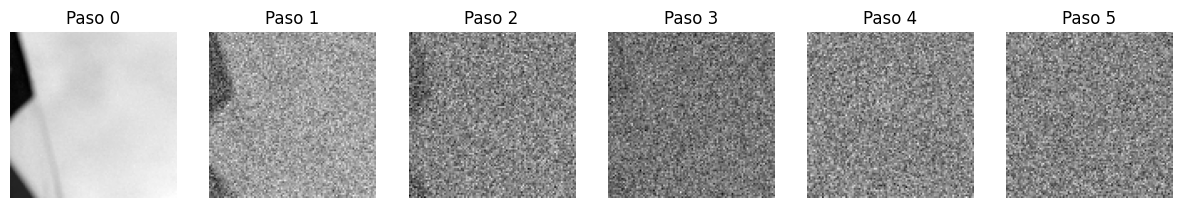

In [7]:
# Cargar imagen astronauta y pasar a escala de grises
image = color.rgb2gray(img_as_float(data.astronaut()))
image = image[50:150, 50:150]  # recortamos un trozo

# Mostrar pasos de degradación
T = 6
fig, axs = plt.subplots(1, T, figsize=(15,3))
for t in range(T):
    axs[t].imshow(add_noise(image, t, T-1), cmap="gray")
    axs[t].axis("off")
    axs[t].set_title(f"Paso {t}")
plt.show()


### Reverse process con el astronauta

Ahora simularemos la fase inversa aplicando varias rondas de **suavizado gaussiano**.  
Aunque no reconstruya la imagen original a la perfección, nos da una idea de cómo la limpieza progresiva va recuperando formas.


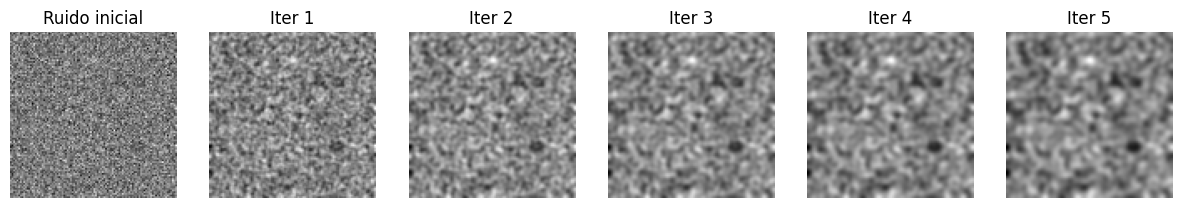

In [9]:
# Imagen completamente ruidosa
noisy = add_noise(image, T-1, T-1)

# Reverse iterativo
steps = 5
fig, axs = plt.subplots(1, steps+1, figsize=(15,3))
axs[0].imshow(noisy, cmap="gray")
axs[0].set_title("Ruido inicial")
axs[0].axis("off")

cleaned = noisy.copy()
for i in range(steps):
    cleaned = gaussian_filter(cleaned, sigma=0.8)
    axs[i+1].imshow(cleaned, cmap="gray")
    axs[i+1].set_title(f"Iter {i+1}")
    axs[i+1].axis("off")

plt.show()


## Conclusión Demo 1

Hemos visto cómo:
- El **forward process** degrada una imagen hasta convertirla en ruido.
- El **reverse process** puede intentar recuperarla limpiando progresivamente.

En los modelos reales:
- El forward se hace de forma matemática.
- El reverse lo aprende una red neuronal (U-Net), mucho más potente que un simple filtro.

Esto sienta las bases para entender cómo Stable Diffusion genera imágenes a partir de ruido puro.


## Ejemplo 2: MNIST

Ahora usamos un dígito de **MNIST (28x28 px)**.  
Esto nos permitirá ver con mucha más claridad el concepto:
- La imagen clara se degrada con ruido.
- Luego, mediante limpieza iterativa, va reapareciendo la forma del dígito.


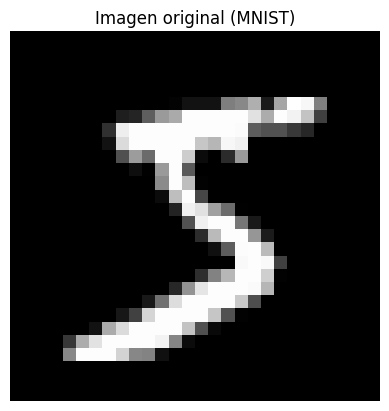

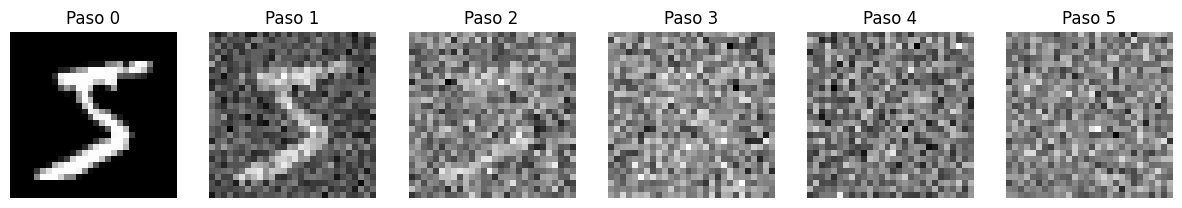

In [10]:
from tensorflow.keras.datasets import mnist

# Cargar MNIST
(x_train, _), (_, _) = mnist.load_data()
mnist_img = x_train[0] / 255.0  # normalizamos entre 0 y 1

# Mostrar imagen original
plt.imshow(mnist_img, cmap="gray")
plt.title("Imagen original (MNIST)")
plt.axis("off")
plt.show()

# Forward process con ruido
T = 6
fig, axs = plt.subplots(1, T, figsize=(15,3))
for t in range(T):
    axs[t].imshow(add_noise(mnist_img, t, T-1), cmap="gray")
    axs[t].axis("off")
    axs[t].set_title(f"Paso {t}")
plt.show()


### Reverse process con MNIST

Aquí veremos cómo, desde una imagen totalmente ruidosa, podemos aplicar **varios pasos de limpieza**.  
El dígito irá reapareciendo poco a poco, ilustrando lo que hacen los modelos de difusión.


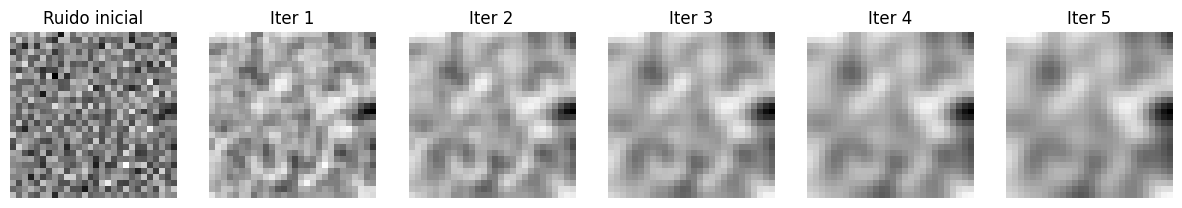

In [11]:
# Imagen completamente ruidosa
noisy_mnist = add_noise(mnist_img, T-1, T-1)

# Reverse iterativo
steps = 5
fig, axs = plt.subplots(1, steps+1, figsize=(15,3))
axs[0].imshow(noisy_mnist, cmap="gray")
axs[0].set_title("Ruido inicial")
axs[0].axis("off")

cleaned = noisy_mnist.copy()
for i in range(steps):
    cleaned = gaussian_filter(cleaned, sigma=0.8)
    axs[i+1].imshow(cleaned, cmap="gray")
    axs[i+1].set_title(f"Iter {i+1}")
    axs[i+1].axis("off")

plt.show()


## Conclusión Demo 1

- La **fase directa (forward)** degrada la imagen hasta volverla ruido.  
- La **fase inversa (reverse)** se puede simular como un proceso de limpieza iterativa.  
- En los modelos reales, aquí se usa una red U-Net entrenada para predecir y quitar ruido.  
- Con MNIST queda muy claro: el dígito emerge desde el ruido.  

Esto ilustra la base de cómo funcionan los modelos de difusión antes de aplicar las optimizaciones de Stable Diffusion.
